<a href="https://colab.research.google.com/github/tenzingsherpaa/Exoplanets/blob/main/Tenzing_Sherpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Taking our fake astronomy data to the next level

---------------

Similar to what we did yesterday, we're going to continue working with fake astronomy data!  

In [ ]:
def square_dip(t,array,mass,depth,period,seed=88):
    np.random.seed(seed)
    
    transit_expected = array.copy()
    start = round(np.random.uniform(1,20))
    stop = start + mass
    while stop < len(t):
        transit_expected[start:stop] = depth
        start += period
        stop = start + mass
    return transit_expected

gConstant = 6.67408 * 10**-11


def find_orbits(gConstant, mass, period):
  numerator = gConstant*mass*t**2
  denominator = 4*math.pi**2
  divide = numerator / denominator 
  radius = np.cbrt(divide)
  return radius


def find_velocity(gConstant,mass,radius):

  numerator = gConstant * mass
  velocity = numerator / radius
  return math.sqrt(velocity)



In [ ]:
def add_scatter(t,array,limit):
    # This is just a lazy (or SMART) way to add the noise :)
    return array + np.random.normal(0, limit, len(t))

In [ ]:
t = np.arange(0,200) # the array of time values

# making some fake error bars
errors = 0.01 + np.random.uniform(0,0.01,len(t))

In [ ]:
# this is where you define your planets!
star = np.ones(len(t))                              # Array of 1's that mimics the light from our star. 
planet1 = square_dip(t, star, 5,0.8,22)               # Adding the first planet

#adding in noise to make it look like real data!
measurements = add_scatter(t, planet1, 0.015)           # use the array called "planet1" here because we only have one planet so far

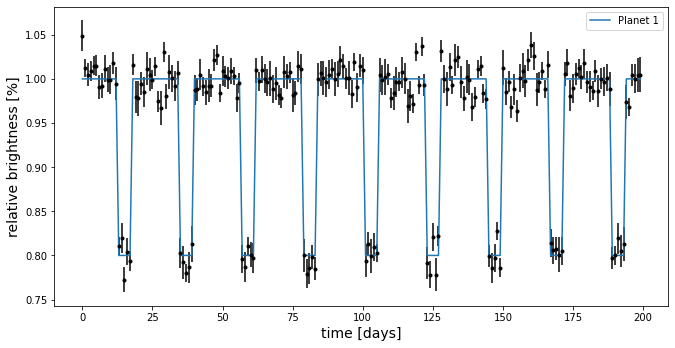

In [ ]:
plt.figure(figsize=(11,5.5))

# we want to see the planets individually
plt.plot(t, planet1, label='Planet 1')              ## plot the line fit for Planet 1
plt.errorbar(t, measurements, errors, fmt='k.')     ## plot the measurements and errors for Planet 1
                                                 
plt.legend()
plt.xlabel('time [days]', size=14)
plt.ylabel('relative brightness [%]', size=14)

plt.show()

So far, so good. Now we want to add a second planet. We are going to take the array called planet1 and send it through our "square-dip" function again. Let's visualize what happens and then go through it. 

In [ ]:
## build a data set of measurements, which includes multiple planet observations at once
star = np.ones(len(t))                                      # array of 1's that mimics the light from our star. 
planet1 = square_dip(t, star, 5, 0.8, 22, seed=1)           # add the first planet
all_planets = square_dip(t, planet1 , 8, 0.7, 35, seed=2)   # add the second planet to the array that already has the first planet in it. 
                                                            # make sure to use a different random seed than in planet1      

# remember that when we make our lines that trace each individual planet, we use the "star" array because
# we want to know what the transit for JUST that planet looks like. If we use the arrays with the planets included
# we will end up getting a line that traces all the planets at the same time. 

## find the individual predicted light curves for each planet
planet1  = square_dip(t, star, 5, 0.8, 22, seed=1)          # a line that traces just planet1
planet2  = square_dip(t, star, 8, 0.7, 35, seed=2)          # a line that traces just planet2

In [ ]:
plt.figure(figsize=(11,5.5))

# add noise/scatter to our measurements so they look like real data
measurements = add_scatter(t, all_planets, 0.015)
plt.errorbar(t, measurements, errors, fmt='k.')

## plot the light curves on top of the data
plt.plot(t, planet1, label='Planet 1', color='g')           
plt.plot(t, planet2, label="Planet 2", color='r')

plt.legend()
plt.xlabel('time [days]', size=14)
plt.ylabel('relative brightness [%]', size=14)

plt.savefig('look_at_my_amazing_planets.png')
plt.show()

NameError: ignored

Notice how we now have two planets in the "planets" array but each line traces the individual planets in the solar system we have build. Now we are going to make one with 4 planets, and remember that we order the planets from largest 'depth' to smallest 'depth'.

In [ ]:
## build a data set of measurements, which includes multiple planet observations at once
star = np.ones(len(t))                                      # array of 1's that mimics the light from our star. 
planet1 = square_dip(t, star, 5, 0.8, 22, seed=1)           # add the first planet
planet2 = square_dip(t, planet1 , 8, 0.7, 35, seed=2)       # add the second planet to the array with planet 1 in it. 
planet3 = square_dip(t, planet2, 4, 0.6, 58, seed=3)        # add the third planet to the array with planet1 and planet2 in it. 
all_planets = square_dip(t, planet3, 12, 0.44, 49, seed=4)  # add the fourth planet tot he array with planet1, planet2 and planet3 in it. 


## find the individual predicted light curves for each planet
planet1  = square_dip(t, star, 5, 0.8, 22, seed=1)  
planetO1 = find_orbits(gConstant, 5, 22)
planetV1 = find_velocity(gConstant, 5, radius)   
     # a line tracing only planet1 
planet2  = square_dip(t, star, 8, 0.7, 35, seed=2)          # a line tracing only planet2
planet3 = square_dip(t, star, 4, 0.6, 58, seed=3)           # a line tracing only planet3
planet4 = square_dip(t, star, 12, 0.44, 49, seed=4)         # a line tracing only planet4

NameError: ignored

In [ ]:
plt.figure(figsize=(11,5.5))

plt.plot(t, planet1, label='Planet 1', color='g')           
plt.plot(t, planet2, label="Planet 2", color='r')
plt.plot(t, planet3, label='Planet 3', color='b')
plt.plot(t, planet4, label='Planet 4', color='darkorange')

# adding in noise to make it look like real data!
measurements = add_scatter(t, all_planets, 0.015)           # use the array called all_planets to add some pretend noise/scatter
                                                            # all_planets represents our measured data, which includes all four planets
plt.errorbar(t, measurements, errors, fmt='k.')

plt.legend()
plt.xlabel('time [days]')
plt.ylabel('relative brightness [%]')

#plt.savefig('look_at_my_amazing_planets.png')
plt.show()

## What do the orbits in your solar system look like?

Another fun way you can describe your solar system with physics is by describing the orbital properties of the planets around your star. In general, if we know the orbital period of our planet, we can solve for the radius of orbit (assuming circular orbits):

 $T^2 = \frac{4 \pi^2}{GM}r^3$

 where $T$ is the orbital period, $G$ is the gravitational constant, and $M$ is the mass of your star. This is part of Kepler's 3rd law of planetary motion!

 Write a python function called "find_orbits" that calculates the orbital radii $r$ for the planets in your solar system above. Assume that your star has the same mass as the sun (1.99$\times 10^{30}$ kg).

In [ ]:
import math

def find_orbits(gravity, mass, period):
  numerator = 4 * math.pi**2
  denominator = gravity * mass
  divide = numerator / denominator 
  product = divide *  **3
  return math.sqrt(product)

Where are your planets located around your "sun" compared to the planets in our solar system? 

In [ ]:
find_orbits(4,10,5)

Once you know the orbital radii, you can also solve for the orbital velocities of your planets:

$v^2 = \frac{GM}{r}$

Write another python function that finds the velocities of your planets.

In [ ]:
def find_velocity(gravity,mass,radius):

  numerator = gravity * mass
  velocity = numerator / radius
  return math.sqrt(velocity)